In [79]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Importing Housing.csv
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [81]:
# check shape
day.shape

(730, 16)

In [82]:
# check for null values and dtypes
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [118]:
# drop casual and registered as we already have count
# drop dteday as year, month column already exist
# drop instant as it is an index
day.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

In [119]:
# map all values of categorical values
day['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
day['weathersit'].replace({1:"Clear",2:"Misty",3:"Light_weather",4:"Extreme_weather"},inplace=True)
day['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
day['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

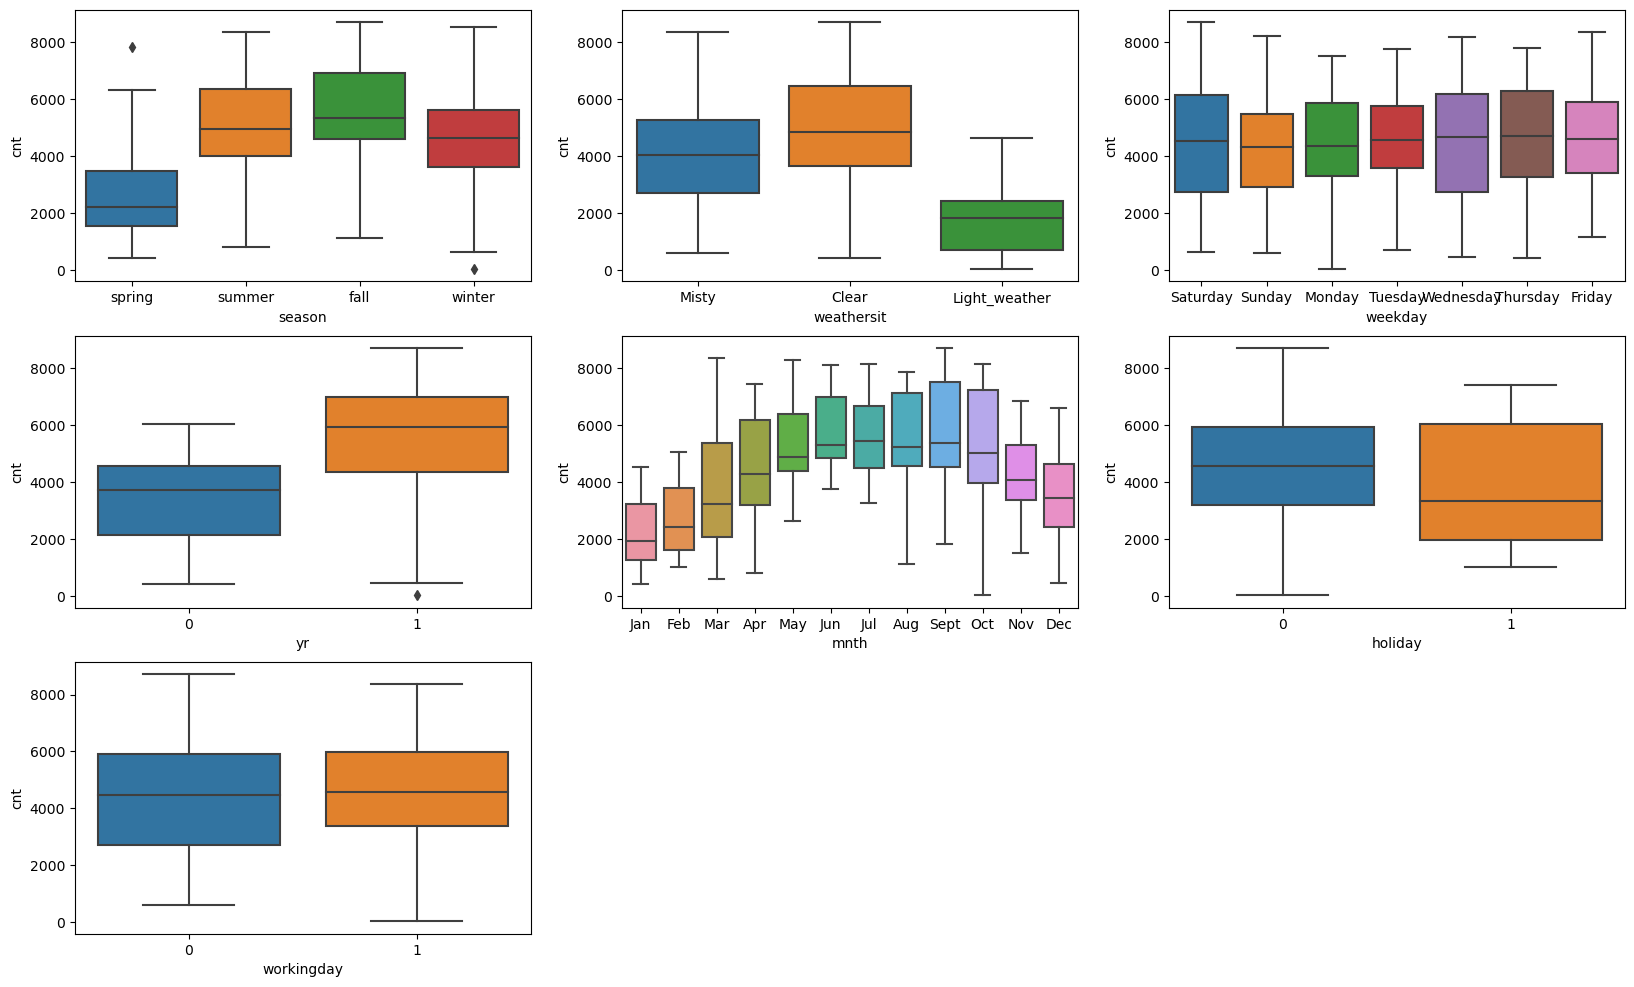

In [85]:
# Create boxplots of the categorical variables to analyze
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

In [120]:
# Create dummies for categorical columns where number of categories > 2

# Create the dummy variable for season
SeasonCondition = pd.get_dummies(day['season'], drop_first=True).astype(int)
# Set the column names to season values. Skip the first category (due to drop_first=True)
SeasonCondition.columns = day['season'].unique()[1:]

# repeat same for the rest

WeatherCondition=pd.get_dummies(day['weathersit'],drop_first=True).astype(int)
WeatherCondition.columns = day['weathersit'].unique()[1:]

DayOfWeek=pd.get_dummies(day['weekday'],drop_first=True).astype(int)
DayOfWeek.columns = day['weekday'].unique()[1:]

MonthName=pd.get_dummies(day['mnth'],drop_first=True).astype(int)
MonthName.columns = day['mnth'].unique()[1:]

In [121]:
day=pd.concat([day,SeasonCondition],axis=1)
day=pd.concat([day,WeatherCondition],axis=1)
day=pd.concat([day,DayOfWeek],axis=1)
day=pd.concat([day,MonthName],axis=1)

In [89]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'summer',
       'fall', 'winter', 'Clear', 'Light_weather', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [122]:
# Drop the older variables season, weathersit, weekday, mnth
day.drop(['season'],axis=1,inplace=True)
day.drop(['weathersit'],axis=1,inplace=True)
day.drop(['weekday'],axis=1,inplace=True)
day.drop(['mnth'],axis=1,inplace=True)

In [91]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   summer         730 non-null    int32  
 9   fall           730 non-null    int32  
 10  winter         730 non-null    int32  
 11  Clear          730 non-null    int32  
 12  Light_weather  730 non-null    int32  
 13  Sunday         730 non-null    int32  
 14  Monday         730 non-null    int32  
 15  Tuesday        730 non-null    int32  
 16  Wednesday      730 non-null    int32  
 17  Thursday       730 non-null    int32  
 18  Friday    

### EDA

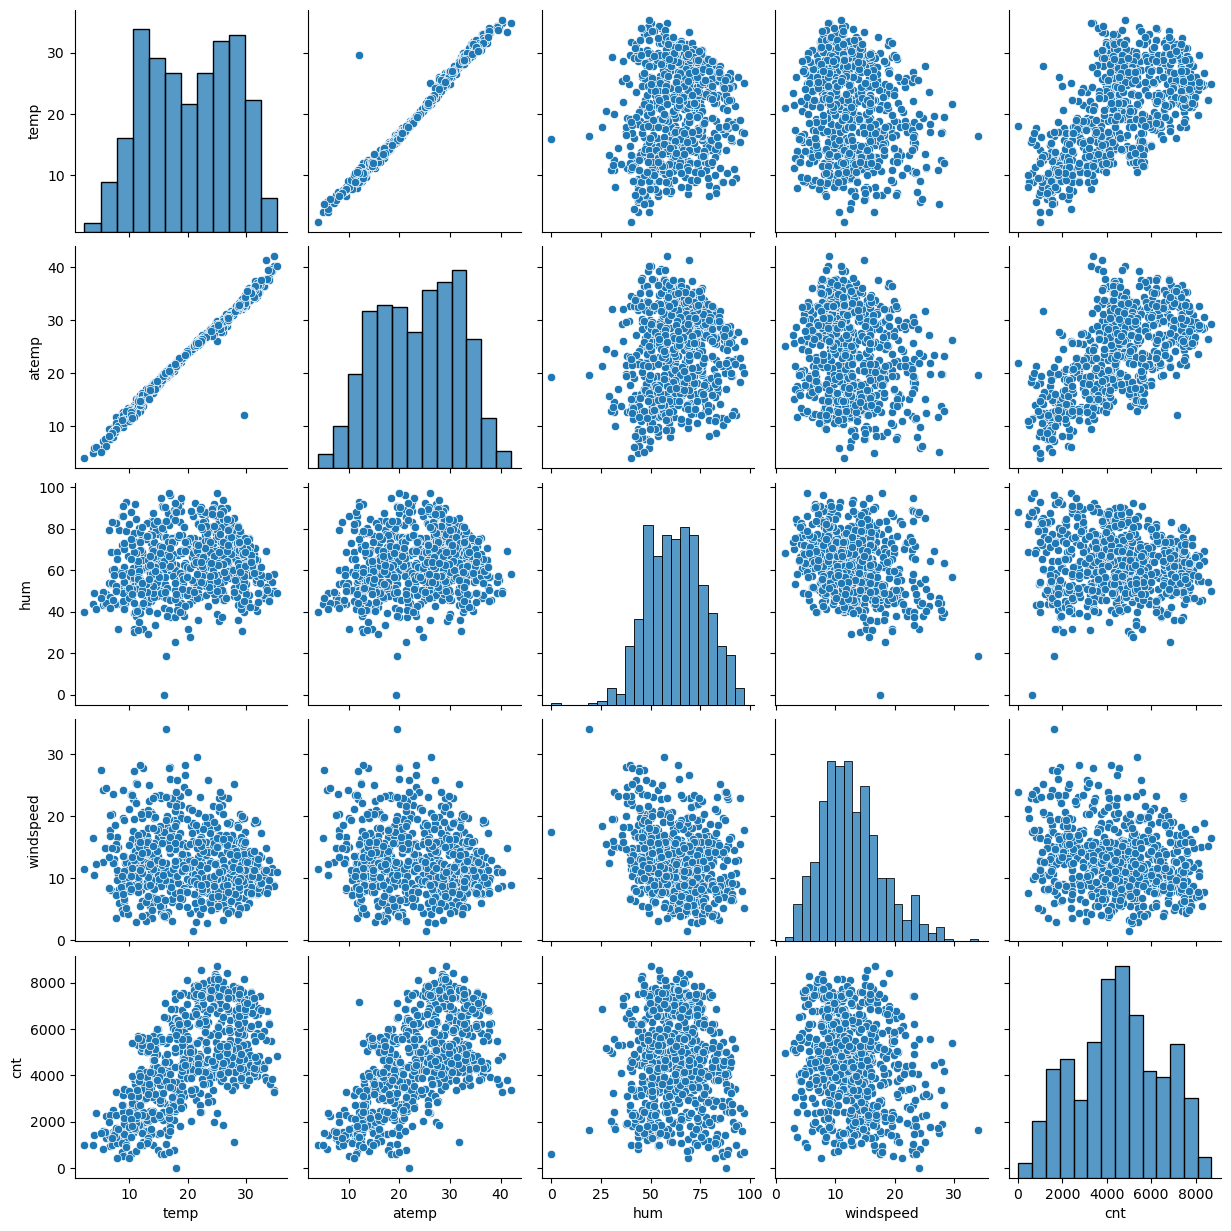

In [92]:
# create pairplots for numeric variables
sns.pairplot(day, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [123]:
# There is linear relation between temp and atemp, so we can drop one of them
day.drop(columns=['temp'],axis=1,inplace=True)

In [94]:
day.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Clear', 'Light_weather', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

<Axes: >

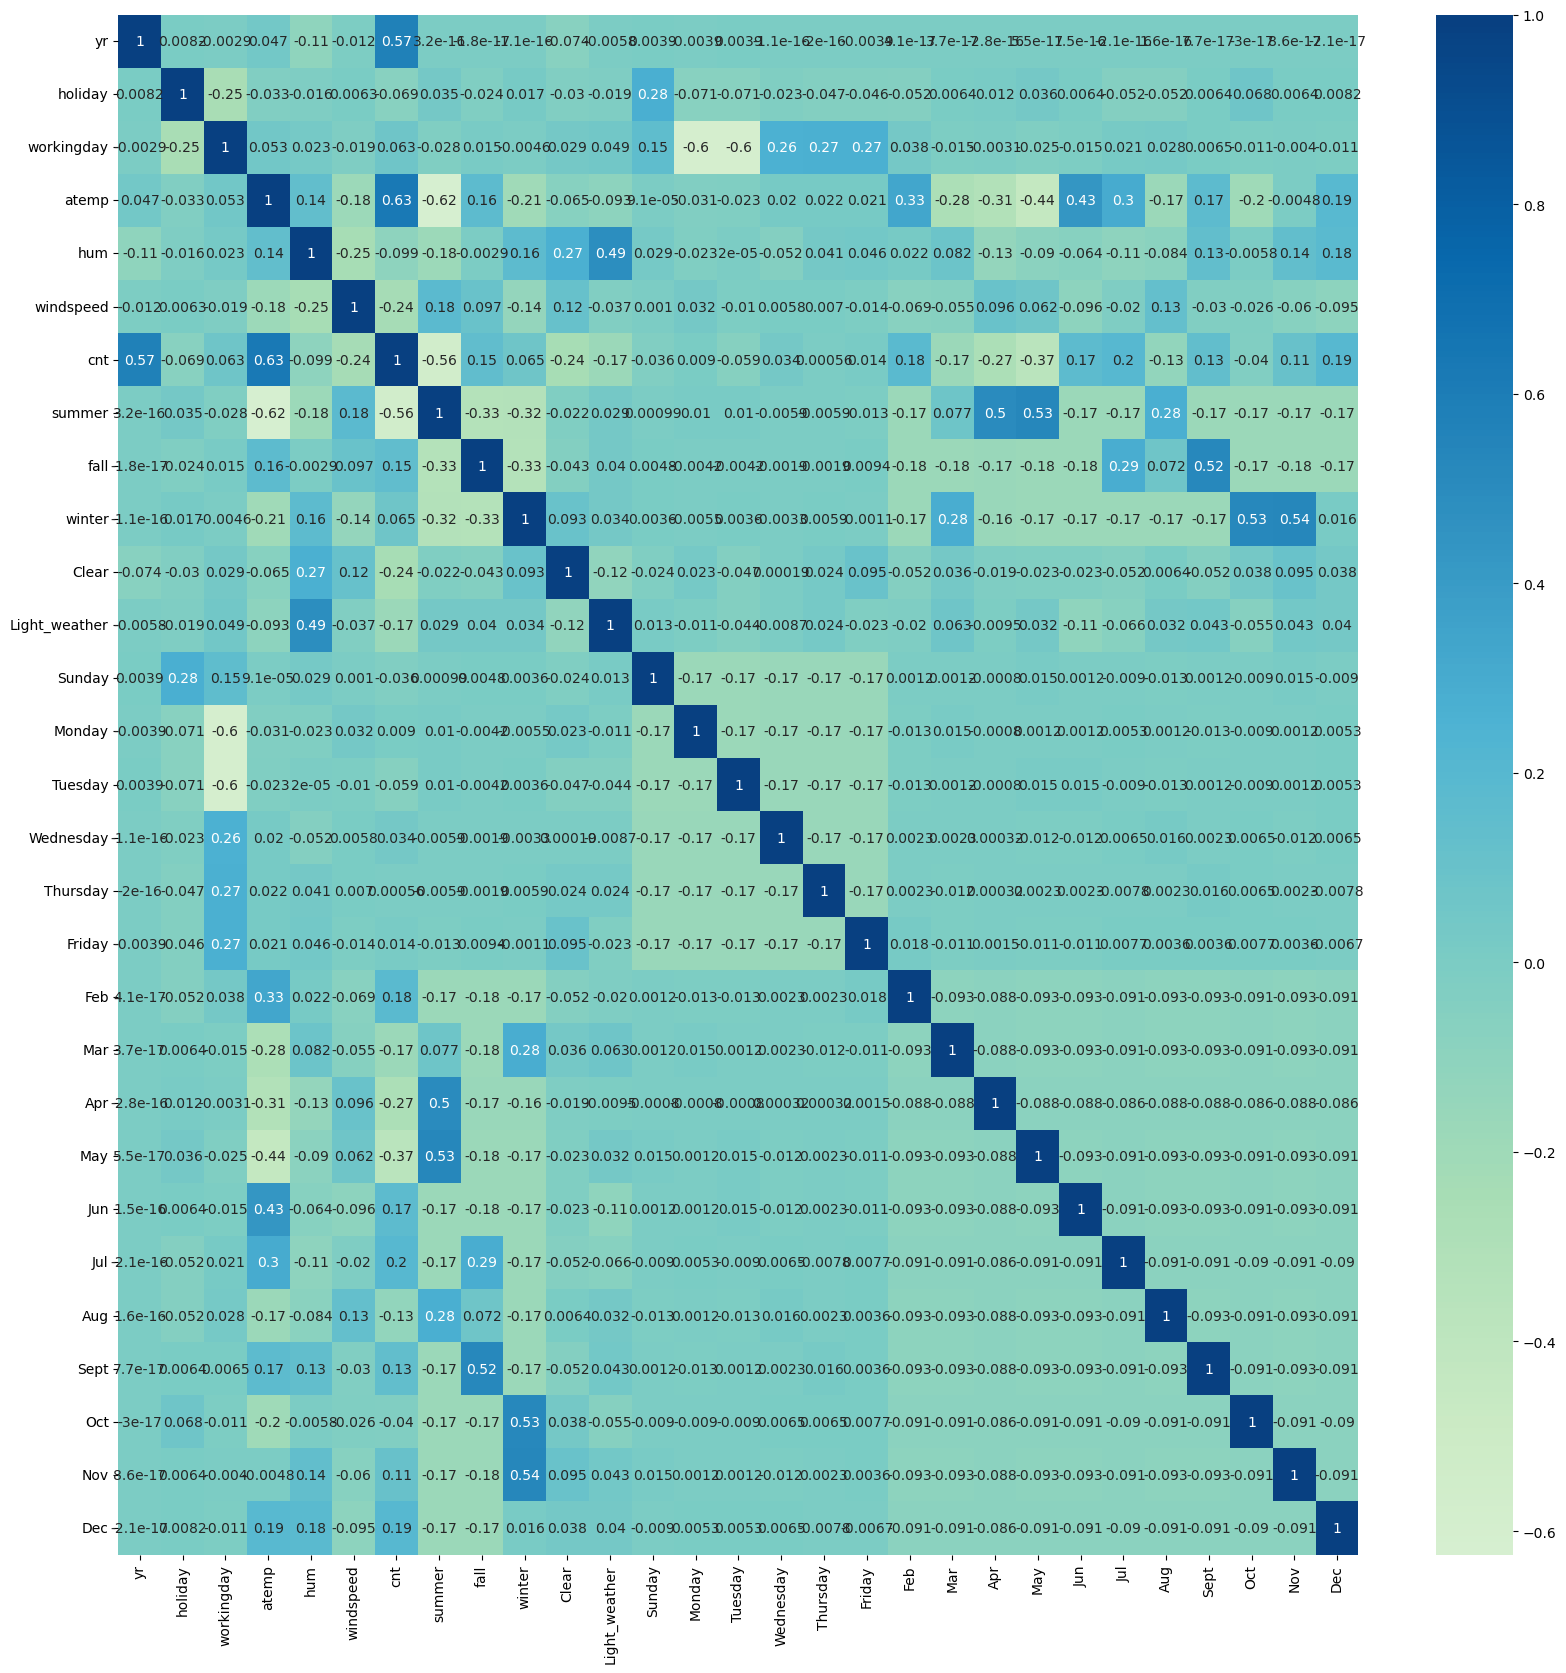

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

# correlation among variables
plt.figure(figsize=[20,20])
sns.heatmap(day.corr(),cmap='GnBu',center=0,annot=True)

atemp and yr have the highest correlations with cnt

### Splitting Data into Train and Test Sets

In [124]:
from sklearn.model_selection import train_test_split
# 70 percent data in train set and 30 percent in test set
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
#### MinMax scaling.

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [126]:
# Apply scaler() to all the numeric variables except the '1-0' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# to ensure highest is 1 after scaling
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [128]:
# cnt is target variable
y_train = df_train.pop('cnt')
X_train = df_train

### Using Stats model building approach

In [129]:
# Creating X_train dataframe for stats model building
X_train_stats = X_train

In [130]:
# Adding a constant variable 
import statsmodels.api as sm
X_train1 = sm.add_constant(X_train)
# Running the linear model
lm_1 = sm.OLS(y_train,X_train1).fit()   
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          4.12e-180
Time:                        20:37:30   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2617      0.035      7.468

In [131]:
# drop Aug as its p-value is very high and rebuild model
X_train_stats=X_train.drop(["Aug"],axis=1)
X_train2 = sm.add_constant(X_train_stats)
lm_2 = sm.OLS(y_train,X_train2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.96e-181
Time:                        20:37:36   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     483   BIC:                            -879.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2613      0.033      7.969

Dropping Aug did not effect R square so it was insignificant

In [132]:
# remove Nov as its p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Nov"],axis=1)
X_train3 = sm.add_constant(X_train_stats)
lm_3 = sm.OLS(y_train,X_train3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.86e-182
Time:                        20:37:41   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2632      0.032      8.216

In [ ]:
Dropping Nov did not effect R square so it was insignificant

In [133]:
# remove Friday as its p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Friday"],axis=1)
X_train4 = sm.add_constant(X_train_stats)
lm_4 = sm.OLS(y_train,X_train4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          4.12e-183
Time:                        20:37:45   Log-Likelihood:                 523.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     485   BIC:                            -891.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2624      0.032      8.206

In [ ]:
Dropping Friday did not effect R square so it was insignificant

In [134]:
# remove Wednesday as its p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Wednesday"],axis=1)
X_train5 = sm.add_constant(X_train_stats)
lm_5 = sm.OLS(y_train,X_train5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          4.61e-184
Time:                        20:37:49   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     486   BIC:                            -897.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2609      0.032      8.184

In [ ]:
Dropping Wednesday did not effect R square so it was insignificant

In [135]:
# remove Jun as p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Jun"],axis=1)
X_train6 = sm.add_constant(X_train_stats)
lm_6 = sm.OLS(y_train,X_train6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.27e-185
Time:                        20:37:53   Log-Likelihood:                 523.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2541      0.030      8.345

In [ ]:
Dropping Jun did not effect R square so it was insignificant

In [136]:
# remove holiday as p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["holiday"],axis=1)
X_train7 = sm.add_constant(X_train_stats)
lm_7 = sm.OLS(y_train,X_train7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.27e-185
Time:                        20:37:56   Log-Likelihood:                 523.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2712      0.046      5.845

In [ ]:
Dropping holiday did not effect R square so it was insignificant

In [137]:
# remove Tuesday as p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Tuesday"],axis=1)
X_train8 = sm.add_constant(X_train_stats)
lm_8 = sm.OLS(y_train,X_train8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          6.89e-186
Time:                        20:38:00   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2950      0.039      7.656

In [138]:
# remove Thursday as p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Thursday"],axis=1)
X_train9 = sm.add_constant(X_train_stats)
lm_9 = sm.OLS(y_train,X_train9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.31e-186
Time:                        20:38:04   Log-Likelihood:                 521.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -912.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2960      0.039      7.679

Dropping Thursday did not effect R square so its insignificant

In [139]:
# remove Jul as its p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Jul"],axis=1)
X_train10 = sm.add_constant(X_train_stats)
lm_10 = sm.OLS(y_train,X_train10).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.60e-187
Time:                        20:38:08   Log-Likelihood:                 520.56
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2902      0.038      7.552

In [140]:
# remove Sept as its p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Sept"],axis=1)
X_train11 = sm.add_constant(X_train_stats)
lm_11 = sm.OLS(y_train,X_train11).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.25e-187
Time:                        20:38:13   Log-Likelihood:                 519.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     491   BIC:                            -919.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2777      0.038      7.345

In [141]:
# remove summer as its p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["summer"],axis=1)
X_train12 = sm.add_constant(X_train_stats)
lm_12 = sm.OLS(y_train,X_train12).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          4.77e-188
Time:                        20:38:19   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2437      0.033      7.438

In [142]:
# remove Sunday as p-value is very high and rebuild model
X_train_stats=X_train_stats.drop(["Sunday"],axis=1)
X_train13 = sm.add_constant(X_train_stats)
lm_13 = sm.OLS(y_train,X_train13).fit()
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.69e-188
Time:                        20:38:25   Log-Likelihood:                 515.75
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     493   BIC:                            -925.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.033      7.399

In [143]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_stats
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.70
2,atemp,14.97
1,workingday,4.67
4,windspeed,4.03
6,winter,3.04
5,fall,2.30
8,Light_weather,2.23
0,yr,2.07
13,May,1.97
9,Monday,1.83


In [144]:
# remove hum as its VIF is very high and rebuild model
X_train_stats=X_train_stats.drop(["hum"],axis=1)
X_train14 = sm.add_constant(X_train_stats)
lm_14 = sm.OLS(y_train,X_train14).fit()
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          2.90e-186
Time:                        20:38:46   Log-Likelihood:                 507.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     494   BIC:                            -915.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1647      0.027      6.173

In [145]:
vif = pd.DataFrame()
X = X_train_stats
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.43
1,workingday,4.56
3,windspeed,3.99
5,winter,2.65
4,fall,2.09
0,yr,2.06
8,Monday,1.81
13,Oct,1.78
9,Feb,1.60
7,Light_weather,1.58


In [146]:
# remove atemp as its VIF is very high and rebuild model
X_train_stats=X_train_stats.drop(["atemp"],axis=1)
X_train15 = sm.add_constant(X_train_stats)
lm_15 = sm.OLS(y_train,X_train15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          2.89e-150
Time:                        20:39:06   Log-Likelihood:                 419.08
No. Observations:                 510   AIC:                            -808.2
Df Residuals:                     495   BIC:                            -744.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4725      0.019     25.145

In [147]:
vif = pd.DataFrame()
X = X_train_stats
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.64
1,workingday,3.55
4,winter,2.59
3,fall,1.98
0,yr,1.92
12,Oct,1.77
7,Monday,1.62
6,Light_weather,1.58
9,Mar,1.43
8,Feb,1.36


R square value decreased significantly on dropping atemp, and we already saw that atemp has a good correlation with cnt so we will not drop it. We will consider X_train14/lm_14 to be the final train set using statsmodel

### Building the model using RFE

In [148]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [149]:
# Initialize the Linear Regression model
lm = LinearRegression()

# Initialize RFE with the estimator and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [150]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 5),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('Light_weather', True, 1),
 ('Sunday', False, 9),
 ('Monday', True, 1),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Thursday', False, 10),
 ('Friday', False, 13),
 ('Feb', False, 6),
 ('Mar', True, 1),
 ('Apr', False, 3),
 ('May', True, 1),
 ('Jun', True, 1),
 ('Jul', False, 7),
 ('Aug', False, 14),
 ('Sept', False, 4),
 ('Oct', True, 1),
 ('Nov', False, 12),
 ('Dec', True, 1)]

In [151]:
# columns deemed significant by RFE
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'Clear', 'Light_weather', 'Monday', 'Mar', 'May', 'Jun', 'Oct', 'Dec'],
      dtype='object')

In [152]:
# columns deemed insignificant by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'fall', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Feb', 'Apr', 'Jul', 'Aug', 'Sept', 'Nov'],
      dtype='object')

### Build model using statsmodel using the results from RFE

In [153]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [154]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_rfe16 = sm.add_constant(X_train_rfe)
# Running the linear model
lm_16 = sm.OLS(y_train,X_train_rfe16).fit()   
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          9.67e-187
Time:                        20:39:43   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3662      0.032     11.425

In [155]:
# Check VIF values of the variables. 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,winter,2.93
5,summer,2.89
8,Light_weather,2.26
0,yr,2.06
13,Oct,1.82
11,May,1.75
10,Mar,1.54


For this model we want to keep p-value < 0.05 and VIF < 5

In [156]:
# remove monday as its p-value is very high and rebuild model
X_train_rfe=X_train_rfe.drop(["Monday"],axis=1)
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm_17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          2.58e-187
Time:                        20:39:54   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3704      0.032     11.578

In [157]:
# Check VIF values of the variables. 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,summer,2.89
8,Light_weather,2.26
0,yr,2.06
12,Oct,1.82
10,May,1.75
9,Mar,1.54


In [158]:
# remove hum as its VIF is very high and rebuild model
X_train_rfe=X_train_rfe.drop(["hum"],axis=1)
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm_18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.95e-185
Time:                        20:40:03   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2931      0.026     11.396

In [159]:
# Check VIF values of the variables. 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,summer,2.35
0,yr,2.06
11,Oct,1.80
9,May,1.65
7,Light_weather,1.53
8,Mar,1.46
10,Jun,1.35


In [56]:
# remove holiday as we already saw in earlier model that holiday is insignificant
X_train_rfe=X_train_rfe.drop(["holiday"],axis=1)
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm_19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          6.75e-184
Time:                        20:17:12   Log-Likelihood:                 493.82
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     497   BIC:                            -906.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2926      0.026     11.261

In [57]:
# remove Jun as as we already saw in earlier model that Jun is insignificant
X_train_rfe=X_train_rfe.drop(["Jun"],axis=1)
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm_20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.09e-182
Time:                        20:17:29   Log-Likelihood:                 488.15
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     498   BIC:                            -901.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3078      0.026     11.912

In [58]:
# Check VIF values of the variables. 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.90
1,atemp,3.74
4,winter,2.50
3,summer,2.33
0,yr,2.05
9,Oct,1.77
8,May,1.64
6,Light_weather,1.51
7,Mar,1.46
10,Dec,1.17


In [59]:
# remove Dec as it is in winter season and winter is already there
X_train_rfe=X_train_rfe.drop(["Dec"],axis=1)
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm_21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.03e-180
Time:                        20:17:41   Log-Likelihood:                 480.64
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     499   BIC:                            -892.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3120      0.026     11.922

In [60]:
# Check VIF values of the variables. 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
1,atemp,3.53
4,winter,2.49
3,summer,2.33
0,yr,2.05
9,Oct,1.75
8,May,1.64
6,Light_weather,1.50
7,Mar,1.45
5,Clear,1.08


### This model has p-value < 0.05 and VIF < 5 for all variables
### R square is 0.823

#### Calculate R square adjusted for training set

In [61]:
X_train_rfe.shape

(510, 10)

In [62]:
# n is number of rows in X
r2_train = 0.823
n = X_train_rfe21.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_train_rfe21.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.8190903614457831

### Lets apply this model to test data

In [63]:
# Predict values
y_train_cnt = lm_21.predict(X_train_rfe21)

In [64]:
# Calculate Residuals
res = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

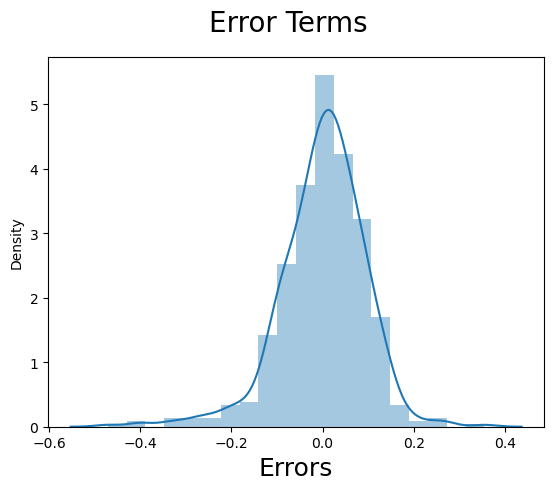

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Residuals are normally distributed so our Linear Regression model is valid

In [66]:
# Applying the scaling on the test set

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [67]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# Divide into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
#Selecting the variables that were part of selected training model
col = X_train_rfe.columns
X_test = X_test[col]
# Adding constant variable to test dataframe
X_test_lm21 = sm.add_constant(X_test)
X_test_lm21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   atemp          219 non-null    float64
 3   windspeed      219 non-null    float64
 4   summer         219 non-null    int32  
 5   winter         219 non-null    int32  
 6   Clear          219 non-null    int32  
 7   Light_weather  219 non-null    int32  
 8   Mar            219 non-null    int32  
 9   May            219 non-null    int32  
 10  Oct            219 non-null    int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 14.5 KB


In [70]:
y_pred = lm_21.predict(X_test_lm21)

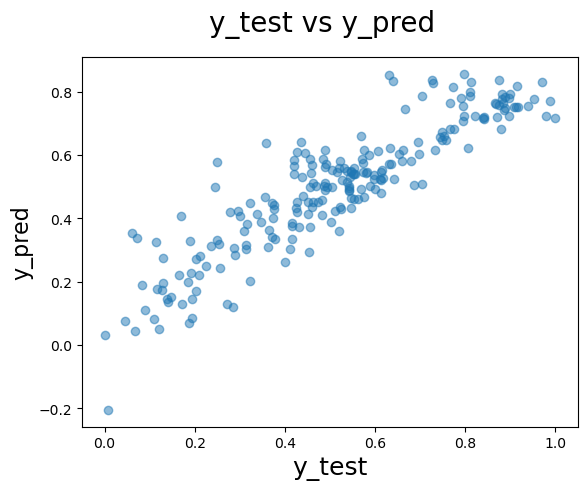

In [72]:
# Plot y_test and y_pred to understand spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8017602870794107

In [74]:
# Get the shape of X_test
X_test.shape

(219, 10)

#### Calculate adjusted R square of test set

In [76]:
r2_test = 0.8017602870794107
# n is number of rows in X
n_test = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p_test = X_test.shape[1]

# Find Adjusted R-squared using formula
adjusted_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
adjusted_r2_test

0.7922295316505362

In [78]:
print(X_train_rfe21.columns)
print(lm_21.summary())

Index(['const', 'yr', 'atemp', 'windspeed', 'summer', 'winter', 'Clear',
       'Light_weather', 'Mar', 'May', 'Oct'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.03e-180
Time:                        20:25:06   Log-Likelihood:                 480.64
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     499   BIC:                            -892.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025

R2 of train set: 0.823
Adjusted R2 of train set: 0.8190903614457831
R2 of test set: 0.8017602870794107
Adjusted R2 of test set: 0.7922295316505362

This seems like a good model to make predictions.

The equation for the best fitted line:

cnt = 0.2366*yr + 0.3788*atemp - 0.1507*windspeed - 0.1179*summer + 0.0628*winter - 0.2865*Clear - 0.0763*Light_weather - 0.0641*Mar - 0.0640*May - 0.0686*Oct